# COGS 108 - EDA Checkpoint

# Names
- Shasanka Nudurupati 
- Siddharth Vyasabattu
- Abigail Vargas
- Emily Lam 
- Pulkit Goyal
- John Chou

<a id='research_question'></a>
# Research Question

*Using scientific ananlysis, we want to focus on studying a relationship where call type, disposition, neighborhood, and priority number of different police calls in San Diego from 2020-2023, as well as, predicting if there is a an influence/correlation for calls from one region in San Diego than others.*

# Setup

In [42]:

import pandas as pd
import numpy as np
import plotly.express as px

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt

#Import scipy to gather statistics
from scipy import stats

# Import patsy and statsmodels for regression analysis
import patsy
import statsmodels.api as sm

# For randomness
import random 

# using dask library for faster parallel processing for large datasets
import dask.dataframe as dd

# Example Functions/Classes 
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Data Cleaning

Describe your data cleaning steps here.

In [43]:
police_calls_2023 = pd.read_csv('Data/pd_calls_for_service_2023_datasd.csv') # has 7.8 MB Data
police_calls_2022 = pd.read_csv('Data/pd_calls_for_service_2022_datasd.csv') # has 47 MB
police_calls_2021 = pd.read_csv('Data/pd_calls_for_service_2021_datasd.csv') # has 53 MB
police_calls_2020 = pd.read_csv('Data/pd_calls_for_service_2020_datasd.csv') # has 53 MB

disp_codes = pd.read_csv('Data/pd_dispo_codes_datasd.csv')
beats = pd.read_csv('Data/pd_beat_codes_list_datasd.csv')
police_calls_2023[police_calls_2023['day_of_week'] == 1]

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E23010000001,2023-01-01 00:00:05,1,0,NaN,05TH,AVE,NaN,G,NaN,FD,CAN,523,2
1,E23010000002,2023-01-01 00:00:30,1,0,NaN,SHOPS INFO LOG,NaN,NaN,NaN,NaN,SHOPS,W,-1,4
2,E23010000003,2023-01-01 00:00:57,1,0,NaN,05TH,AVE,NaN,G,NaN,FD,DUP,523,2
3,E23010000004,2023-01-01 00:01:15,1,600,NaN,FERGUS,ST,NaN,NaN,NaN,AU1,K,433,1
4,E23010000005,2023-01-01 00:02:17,1,0,NaN,CHP INFO LOG,NaN,NaN,NaN,NaN,INFOCHP,W,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76127,E23020038563,2023-02-26 23:52:31,1,7400,NaN,CHARMANT,DR,NaN,NaN,NaN,1131,K,115,1
76128,E23020038564,2023-02-26 23:53:15,1,4500,NaN,WEST POINT LOMA,BLV,NaN,NaN,NaN,11-7,CAN,613,1
76129,E23020038565,2023-02-26 23:54:32,1,0,NaN,CLAIREMONT,DR,NaN,MORENA,NaN,20002,A,116,1
76130,E23020038566,2023-02-26 23:59:17,1,100,NaN,PARK,BLV,NaN,NaN,NaN,1186,DUP,541,3


## Here is the summary of Each of the Datasets per year 

In [44]:
police_calls_big_dataset = pd.concat([police_calls_2023, police_calls_2022, police_calls_2021, police_calls_2020])
police_calls_big_dataset = police_calls_big_dataset.merge(disp_codes, left_on= 'disposition', right_on= 'dispo_code')
police_calls_big_dataset = police_calls_big_dataset.merge(beats)

# Focusing out dataset on the columns that are best measurements for Linear/correlation predictions

police_calls_big_dataset = police_calls_big_dataset[['date_time', 'day_of_week', 'call_type', 'disposition', 'priority', 'description', 'neighborhood', 'address_sfx_primary']]
police_calls_big_dataset = police_calls_big_dataset.sort_values(by = 'priority', ascending = False)

In [45]:
police_calls_big_dataset

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE
...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST


# Data Analysis & Results (EDA)

## Explore the dataset

In [46]:
police_calls_big_dataset.head()

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE


In [47]:
police_calls_big_dataset.tail()

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST
98443,2021-03-16 16:41:28,3,10852,K,0,NO REPORT REQUIRED,East Village,AVE


In [48]:
police_calls_big_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686084 entries, 1588528 to 98443
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   date_time            1686084 non-null  object
 1   day_of_week          1686084 non-null  int64 
 2   call_type            1684494 non-null  object
 3   disposition          1686084 non-null  object
 4   priority             1686084 non-null  int64 
 5   description          1686084 non-null  object
 6   neighborhood         1686084 non-null  object
 7   address_sfx_primary  1558164 non-null  object
dtypes: int64(2), object(6)
memory usage: 115.8+ MB


### Lets get a sense of the dataset

In [49]:
police_calls_big_dataset.shape

(1686084, 8)

### Get some basic statistical descriptions

In [50]:
police_calls_big_dataset.describe()

,day_of_week,priority
count,1.686084e+06,1.686084e+06
mean,4.048520e+00,2.172195e+00
std,1.959725e+00,1.359285e+00
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00
50%,4.000000e+00,2.000000e+00
75%,6.000000e+00,3.000000e+00
max,7.000000e+00,9.000000e+00


According to the results above we see that there are 1,686,084 observations in total for seven variables, and those 2 ( day_of_the week and priority) are the numerical variables are the ones. We need a way to measure the rest of the data time, disposition, priority, description, and neighborhood (5 of the variables) 

### Before we do that, let's look the number of nulls and see if we need to filter the dataset more

In [51]:
## Number of nulls in dataset
police_calls_big_dataset.isnull().sum()

date_time                   0
day_of_week                 0
call_type                1590
disposition                 0
priority                    0
description                 0
neighborhood                0
address_sfx_primary    127920
dtype: int64

In [52]:
## Pull up all the ones that are null call types 
police_calls_big_dataset.groupby(by=["call_type"]).sum()

,day_of_week,priority
call_type,,
1016,71515,33844
1016P,49,22
1016PT,288,114
1016QC,171,78
1021,58426,43502
...,...,...
TLO,918,229
TP,1918,0
TRO,9398,6981


In [53]:
# checking the Data type
police_calls_big_dataset.dtypes

date_time              object
day_of_week             int64
call_type              object
disposition            object
priority                int64
description            object
neighborhood           object
address_sfx_primary    object
dtype: object

## Visualize the Data 


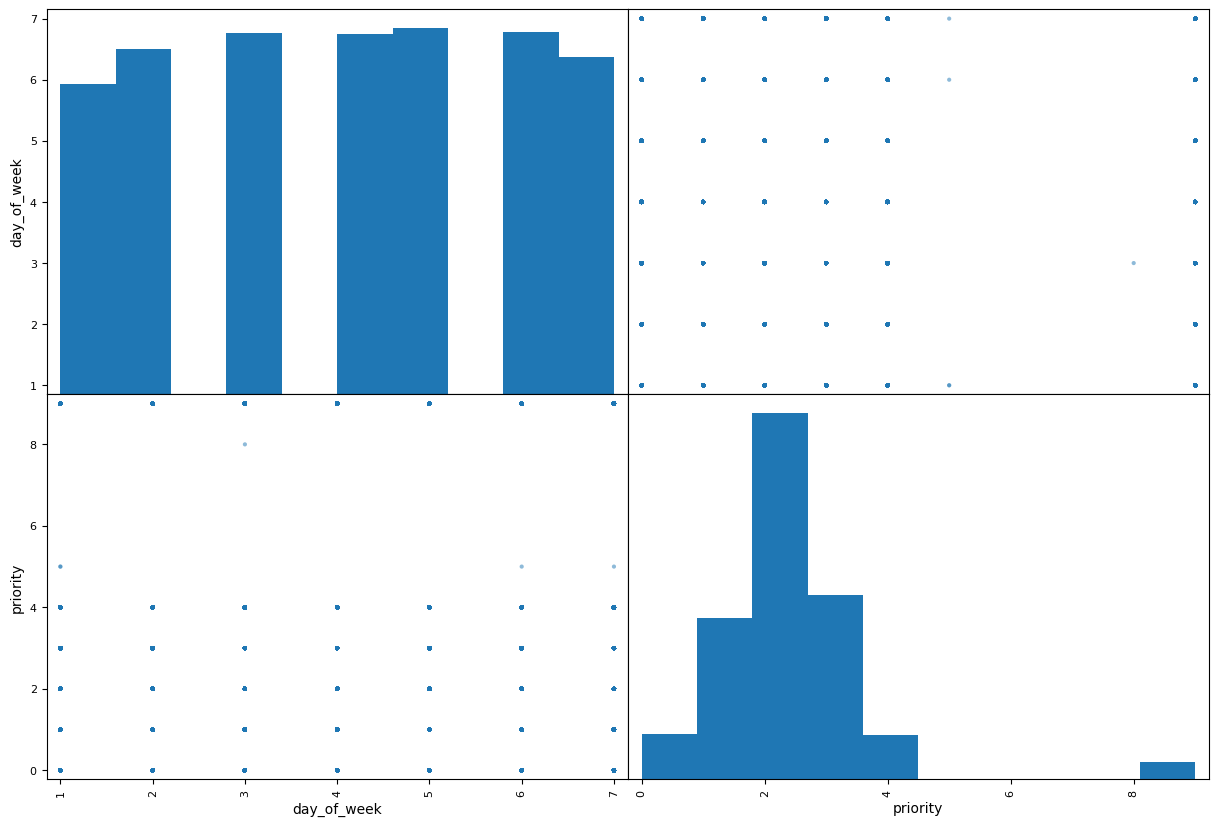

In [54]:
# First look at the scatter matrix 
scatter = pd.plotting.scatter_matrix(police_calls_big_dataset, figsize= (15,10))

<AxesSubplot: xlabel='day_of_week'>

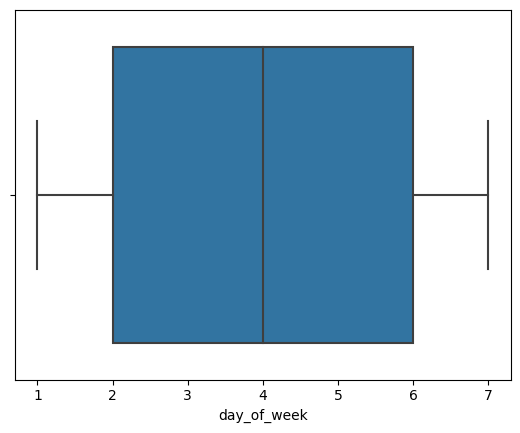

In [55]:
# look at the day of week  distribution 
sns.boxplot(x=police_calls_big_dataset['day_of_week'])

In [56]:
police_calls_big_dataset.describe()

,day_of_week,priority
count,1.686084e+06,1.686084e+06
mean,4.048520e+00,2.172195e+00
std,1.959725e+00,1.359285e+00
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00
50%,4.000000e+00,2.000000e+00
75%,6.000000e+00,3.000000e+00
max,7.000000e+00,9.000000e+00


In [57]:
police_calls_big_dataset.median()

/var/folders/h0/4mt_259953l75s4441dwxc1h0000gn/T/ipykernel_92718/1663241893.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  police_calls_big_dataset.median()


day_of_week    4.0
priority       2.0
dtype: float64

Here you should see a distribution is normal with  majority of the days being around day #4 ( Wednesday). Also it is shown that majority of police calls happen from Monday to Friday ( day 2 - day 6 of the week). This is very interesting and something to futher look into. 

## TO BE CONTINUED ( Visual data with Seaborn/plotly) 
### Analyze correlations ( using corr(), heatmap, pairplot from seaborn)

### Using ML techniques ( Do some OLS,Linear Regression analysis to predict number of calls based on factors) 


### Explore with futher analysis with Geo-Graphical learning, DecisionTree, 

Carry out EDA on your dataset(s); Describe in this section

In [58]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [59]:
df = police_calls_big_dataset
df

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE
...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST


In [60]:
def priority_loc(neighborhood):
    data = df[df['neighborhood'] == neighborhood]['priority'].value_counts()
    return data/data.sum()

In [61]:
priority_loc(neighborhood = 'Bay Park')

2    0.448895
3    0.201263
1    0.191860
4    0.082903
0    0.048163
9    0.026916
Name: priority, dtype: float64

In [62]:
df['date_time'] = pd.to_datetime(df['date_time'])
df

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE
...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST


In [63]:
df['hour'] = df['date_time'].dt.hour
df

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary,hour
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST,16
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST,13
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST,12
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST,14
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE,16
...,...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST,9
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST,7
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST,17
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST,15


In [64]:
df['calls_at_hour'] = df.groupby('hour')['date_time'].transform('count')
df

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary,hour,calls_at_hour
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST,16,87246
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST,13,83222
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST,12,87132
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST,14,85182
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE,16,87246
...,...,...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST,9,88730
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST,7,80151
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST,17,79816
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST,15,86708


## PREDICTING CALLS AT HOUR FROM DAY AND DAY OF WEEK

In [65]:
X = df[['hour', 'day_of_week']]
y = df['calls_at_hour']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
pl_calls = Pipeline([('lin-reg', LinearRegression())])

In [67]:
pl_calls.fit(X_train, y_train)

Pipeline(steps=[('lin-reg', LinearRegression())])

In [68]:
pred = pl_calls.predict(X_test)

In [69]:
def rmse(pred, y):
    mse = mean_squared_error(pred, y_test)
    return np.sqrt(mse)

In [70]:
pred

array([73320.52657355, 85734.69312664, 73672.63079681, ...,
       72293.34819878, 86497.79333397, 70327.01750505])

In [71]:
y_test

462466    95202
937776    75929
765244    95202
722355    86708
282323    76797
          ...  
465072    86708
387861    88730
259473    88730
404441    64837
759229    80151
Name: calls_at_hour, Length: 337217, dtype: int64

In [72]:
rmse(pred, y_test)

15145.639627827488

## PREDICTING PRIORITY FROM ALL OTHER COLUMNS

In [73]:
df = df.drop('date_time', axis = 1)

In [74]:
df['call_type'] = df['call_type'].astype(str)

In [75]:
df

,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary,hour,calls_at_hour
1588528,6,530,R,9,REPORT,Cherokee Point,ST,16,87246
1067134,7,10852R,R,9,REPORT,Bay Park,ST,13,83222
890896,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST,12,87132
1067142,2,488R,R,9,REPORT,Bay Park,ST,14,85182
1428628,4,530,R,9,REPORT,Chollas Creek,AVE,16,87246
...,...,...,...,...,...,...,...,...,...
1156618,5,1183,R,0,REPORT,Golden Hill,ST,9,88730
870004,2,245,R,0,REPORT,North Park,ST,7,80151
203142,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST,17,79816
1315951,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST,15,86708


In [76]:
X = df.drop('priority', axis = 1)
y = df['priority']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
preproc = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'),
     ['call_type', 'disposition', 'description', 'neighborhood', 'address_sfx_primary'])
], remainder = 'passthrough')
preproc

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['call_type', 'disposition', 'description',
                                  'neighborhood', 'address_sfx_primary'])])

In [78]:
pl_priority = Pipeline([('preproc', preproc), ('lin-reg', LinearRegression())])

In [79]:
pl_priority.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['call_type', 'disposition',
                                                   'description',
                                                   'neighborhood',
                                                   'address_sfx_primary'])])),
                ('lin-reg', LinearRegression())])

In [80]:
pl_priority.score(X_test, y_test)

0.8533708196024138

In [81]:
pred = pl_priority.predict(X_test)
rmse(pred, y_test)

0.5191107510149823

#### Lets look  OLS model of the types

run the OLS model process, the features ['call_type', 'disposition', 'description', 'neighborhood', 'address_sfx_primary'] to predict the priorities in the dataset. Since we have the elements from the prediction process, we can just add that to our model

In [84]:
# y = df['address_sfx_primary']
# X = df.drop(['address_sfx_primary'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ohe_columns = ['call_type', 'disposition', 'description', 'neighborhood']
# X_train_ohe = pd.get_dummies(X_train, columns=ohe_columns).astype(float)
# X_test_ohe = pd.get_dummies(X_test, columns=ohe_columns).astype(float)


# X_train_ohe['priority'] = X_train['priority'].astype(float)
# X_test_ohe['priority'] = X_test['priority'].astype(float)


# X_train_ohe = sm.add_constant(X_train_ohe)
# model = sm.OLS(y_train, X_train_ohe).fit()


# X_test_ohe = sm.add_constant(X_test_ohe)
# r_squared = model.rsquared
# predictions = model.predict(X_test_ohe)
# print('R-squared:', r_squared)
# print('Predictions:', predictions)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                              float64
day_of_week                        float64
priority                           float64
hour                               float64
calls_at_hour                      float64
                                    ...   
neighborhood_Torrey Preserve       float64
neighborhood_University City       float64
neighborhood_University Heights    float64
neighborhood_Valencia Park         float64
neighborhood_Wooded Area           float64
Length: 417, dtype: object. The data was
276277      CT
741189     NaN
1083551    AVE
108353     AVE
1649547    AVE
          ... 
996947      ST
353496     AVE
268916      ST
1382822    AVE
1241950    AVE
Name: address_sfx_primary, Length: 1348867, dtype: object
and
          const  day_of_week  priority  hour  calls_at_hour  call_type_1016  \
276277     1.0          7.0       2.0   9.0        88730.0             0.0   
741189     1.0          6.0       2.0  16.0        87246.0             0.0   
1083551    1.0          7.0       1.0   7.0        80151.0             0.0   
108353     1.0          5.0       2.0  23.0        64837.0             0.0   
1649547    1.0          6.0       2.0  19.0        73817.0             0.0   
...        ...          ...       ...   ...            ...             ...   
996947     1.0          4.0       2.0  19.0        73817.0             0.0   
353496     1.0          3.0       1.0  11.0        90356.0             0.0   
268916     1.0          7.0       1.0   1.0        48050.0             0.0   
1382822    1.0          3.0       0.0  22.0        75929.0             0.0   
1241950    1.0          4.0       2.0  11.0        90356.0             0.0   

         call_type_1016P  call_type_1016PT  call_type_1016QC  call_type_1021  \
276277               0.0               0.0               0.0             0.0   
741189               0.0               0.0               0.0             0.0   
1083551              0.0               0.0               0.0             0.0   
108353               0.0               0.0               0.0             0.0   
1649547              0.0               0.0               0.0             0.0   
...                  ...               ...               ...             ...   
996947               0.0               0.0               0.0             0.0   
353496               0.0               0.0               0.0             0.0   
268916               0.0               0.0               0.0             0.0   
1382822              0.0               0.0               0.0             0.0   
1241950              0.0               0.0               0.0             0.0   

         ...  neighborhood_Teralta West  neighborhood_Tierrasanta  \
276277   ...                        0.0                       0.0   
741189   ...                        0.0                       0.0   
1083551  ...                        0.0                       0.0   
108353   ...                        0.0                       0.0   
1649547  ...                        0.0                       0.0   
...      ...                        ...                       ...   
996947   ...                        0.0                       0.0   
353496   ...                        0.0                       0.0   
268916   ...                        0.0                       0.0   
1382822  ...                        0.0                       0.0   
1241950  ...                        0.0                       0.0   

         neighborhood_Tijuana River Valley  neighborhood_Torrey Highlands  \
276277                                 0.0                            0.0   
741189                                 0.0                            0.0   
1083551                                0.0                            0.0   
108353                                 0.0                            0.0   
1649547                                0.0                            0.0   
...                                    ...                            ...   
996947                                 0.0                            0.0   
353496                                 0.0                            0.0   
268916                                 0.0                            0.0   
1382822                                0.0                            0.0   
1241950                                0.0                            0.0   

         neighborhood_Torrey Pines  neighborhood_Torrey Preserve  \
276277                         0.0                           0.0   
741189                         0.0                           0.0   
1083551                        0.0                           0.0   
108353                         0.0                           0.0   
1649547                        0.0                           0.0   
...                            ...                           ...   
996947                         0.0                           0.0   
353496                         0.0                           0.0   
268916                         0.0                           0.0   
1382822                        0.0                           0.0   
1241950                        0.0                           0.0   

         neighborhood_University City  neighborhood_University Heights  \
276277                            0.0                              0.0   
741189                            0.0                              0.0   
1083551                           0.0                              0.0   
108353                            0.0                              0.0   
1649547                           0.0                              0.0   
...                               ...                              ...   
996947                            0.0                              0.0   
353496                            0.0                              0.0   
268916                            0.0                              0.0   
1382822                           0.0                              0.0   
1241950                           0.0                              0.0   

         neighborhood_Valencia Park  neighborhood_Wooded Area  
276277                          0.0                       0.0  
741189                          0.0                       0.0  
1083551                         0.0                       0.0  
108353                          0.0                       0.0  
1649547                         0.0                       0.0  
...                             ...                       ...  
996947                          0.0                       0.0  
353496                          0.0                       0.0  
268916                          0.0                       0.0  
1382822                         0.0                       0.0  
1241950                         0.0                       0.0  

[1348867 rows x 417 columns]
before. After,
['CT' nan 'AVE' ... 'ST' 'AVE' 'AVE']
[[1. 7. 2. ... 0. 0. 0.]
 [1. 6. 2. ... 0. 0. 0.]
 [1. 7. 1. ... 0. 0. 0.]
 ...
 [1. 7. 1. ... 0. 0. 0.]
 [1. 3. 0. ... 0. 0. 0.]
 [1. 4. 2. ... 0. 0. 0.]].

In [44]:
# changes the data type of X_train and 